In [1]:
#IMPORTING THE LIBRARIES
import random as rd
import numpy as np 
import matplotlib.pyplot as plt 
import statistics as stat
import math
from math import *
import pandas as pd
from scipy import integrate as intg
from scipy.stats import linregress
import warnings
import scipy.stats as si
np.seterr(divide='ignore', invalid='ignore')
import scipy.integrate as integrate
from scipy.special import gamma
import cmath
import scipy
warnings.filterwarnings('ignore')

# Estimation of the parameter H

### Question 1

In [2]:
#SETTING THE VALUES OF THE PARAMETERS 
V0=0.05
lamb=0.3
theta=0.05
nu=0.1
alpha=0.6
n=20
r=2.5
T=1
m=10**5
dt=T/m

In [3]:
#Computing the c_i and x_i
c=[0]*n
x=[0]*n
for i in range(n):
    c[i]=((pow(r,1-alpha)-1)/(gamma(alpha)*gamma(2-alpha)))*pow(r,(1-alpha)*(i+1-1-n/2))
    x[i]=(((1-alpha)*pow(r,2-alpha)-1)/((2-alpha)*pow(r,1-alpha)-1))*pow(r,i+1-1-n/2)

In [4]:
#Implementing the function g_0
def g0(t):
    a=0
    for i in range(20):
        a=a+c[i]*(1-exp(-x[i]*t))/x[i]
    b=V0+lamb*theta*a
    return(b)

In [5]:
#Creating the Matrix U(tk,i) using the scheme describe in the handout
U=np.empty((m,n))
U[0,:]=[0]*n
#Computing the path of the vairance V using the matrix U
V=[1]*m
V[0]=g0(0)+np.sum(c*U[0,:])
eps=dt*np.random.normal(0, 1, m)
for k in range(m-1):
    for i in range(n):
        U[k+1,i]=(1/(1+x[i]*dt))*(U[k,i]-lamb*V[k]*dt+nu*sqrt(max(0,V[k]))*eps[k+1])
    V[k+1]=g0((k+1)*dt)+np.sum(c*U[k+1,:])

Text(0.5, 1.0, 'Variance process path')

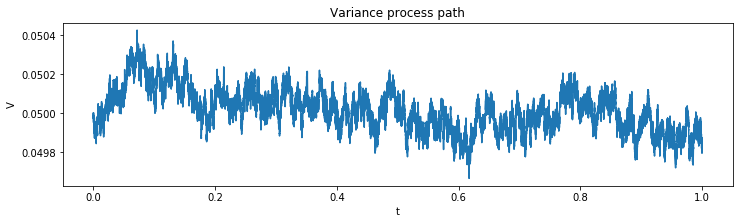

In [6]:
#Plotting the vairance path
plt.figure(figsize=(12,3))
t1=[i*dt for i in range(m)]
plt.plot(t1, V)
plt.xlabel('t')
plt.ylabel('V')
plt.title('Variance process path')

### Question 2

In [7]:
#Implement the moemnt function: 
def m(q, delt):
    a=0
    Mdelta=10**5-delt
    for i in range(Mdelta):
        a=a+pow(abs(V[i+delt]-V[i]),q)
    return (a/Mdelta)

In [8]:
# computing the  vectors  of values of the moment for each  of the 4 value of q
m05=[0]*10 #moments for q=0.5
m1=[0]*10#moments for q=1
m15=[0]*10#moments for q=1.5
m2=[0]*10#moments for q=2
for i in range(10):
    m05[i]=log(m(0.5,i+1)) 
    m1[i]=log(m(1,i+1))
    m15[i]=log(m(1.5,i+1))
    m2[i]=log(m(2,i+1))

In [9]:
#computing the vector containing the values of the log of the delta
logdelta=[log(i) for i in range (1,11)]

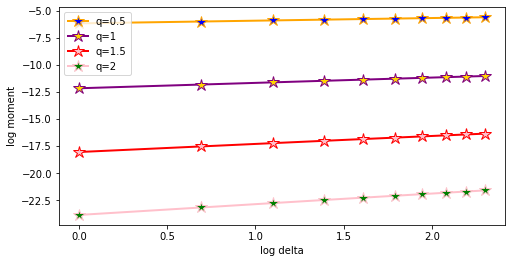

In [10]:
#plotting each vector with respect to the vectors of log delta
plt.figure(figsize=(8,4))
plt.plot( logdelta, m05, marker='*' ,markerfacecolor='blue', markersize=12, color='orange', linewidth=2, label="q=0.5")
plt.plot( logdelta, m1, marker='*' ,markerfacecolor='gold', markersize=12, color='purple', linewidth=2, label="q=1")
plt.plot( logdelta, m15, marker='*' ,markerfacecolor='pink', markersize=12, color='red', linewidth=2, label="q=1.5")
plt.plot( logdelta, m2, marker='*' ,markerfacecolor='green', markersize=12, color='pink', linewidth=2, label="q=2")
# show legend
plt.xlabel('log delta')
plt.ylabel('log moment')
plt.legend(loc='best')

In [11]:
# doing 4 regressions to get the slope of the previous line for each value of q
from scipy.stats import linregress
s05, intercept, r_value, p_value, std_err=linregress(logdelta,m05)
s1, intercept, r_value, p_value, std_err=linregress(logdelta,m1)
s15, intercept, r_value, p_value, std_err=linregress(logdelta,m15)
s2, intercept, r_value, p_value, std_err=linregress(logdelta,m2)


In [12]:
#doing a regression to get the slope of zeta(q) which correpond to the estimation of H
q=[0.5,1,1.5,2]
zetaq=[s05,s1,s15,s2]
print("the parameter H is estimated at",np.polyfit(q, zetaq, 1)[0], 'which is far from the real value',0.1)


the parameter H is estimated at 0.49119330155454605 which is far from the real value 0.1


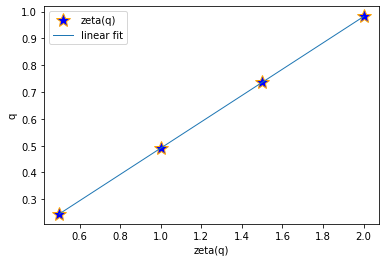

In [13]:
#Plotting the regression result (lines) alongside the real values ( stars)
plt.plot( q, zetaq, marker='*' ,markerfacecolor='blue', markersize=15, color='orange', linewidth=0, label="zeta(q)")
plt.plot(q,[(4.90948241e-01*a-1.15478657e-04) for a in q],linewidth=1, label="linear fit")

# show legend
plt.xlabel('zeta(q)')
plt.ylabel('q')
plt.legend(loc='best')

### Question 3

In [14]:
#function that sample a vector: input step size output sampled vector 
#whom length is equal to the original length divided by the step size
def sampleV(l):
    a=10**5//l
    Vs=[0]*a
    for i in range(a):
        Vs[i]=V[l*i]
    return(Vs)

In [15]:
#creating the vectors of sample size
L=[i for i in range (1,11)]
#creating the vector which gonna contain the estimation of H
#for each sample 
H=[0]*10
# for each l in l we gonna compute 
#the moment of the sample vector v with respect q and delta
for l in L:
    V1=sampleV(l)
    def m(q, delt):
        a=0
        Mdelta=len(V1)-delt
        for i in range(Mdelta):
            a=a+pow(abs(V1[i+delt]-V1[i]),q)
        return (a/Mdelta)
    # computing the  vectors  of values of the moment for each  of the 4 value of q
    m05=[0]*10
    m1=[0]*10
    m15=[0]*10
    m2=[0]*10
    for i in range(10):
        m05[i]=log(m(0.5,i+1))
        m1[i]=log(m(1,i+1))
        m15[i]=log(m(1.5,i+1))
        m2[i]=log(m(2,i+1))
    #computing the vector containing the values of the log of the delta
    s05, intercept, r_value, p_value, std_err=linregress(logdelta,m05)
    s1, intercept, r_value, p_value, std_err=linregress(logdelta,m1)
    s15, intercept, r_value, p_value, std_err=linregress(logdelta,m15)
    s2, intercept, r_value, p_value, std_err=linregress(logdelta,m2)
    #doing a regression to get the slope of zeta(q)
    #which correpond to the estimation of H
    q=[0.5,1,1.5,2]
    zetaq=[s05,s1,s15,s2]
    H[l-1]=np.polyfit(q, zetaq, 1)[0]   

In [16]:
#Putting l and the estimation for 
#sample path of rank l into a dataframe
d = {'l': L, 'H(l)': H}
df = pd.DataFrame(data=d)
df

,l,H(l)
0,1,0.491193
1,2,0.480850
2,3,0.471488
3,4,0.465925
4,5,0.457968
5,6,0.449066
6,7,0.440154
7,8,0.436646
8,9,0.425337
9,10,0.415979


We observe that the more we sample ie the bigger the l  i.e the smaller amount of data we take the worst is the estimation)
H is negatively correlated with l 

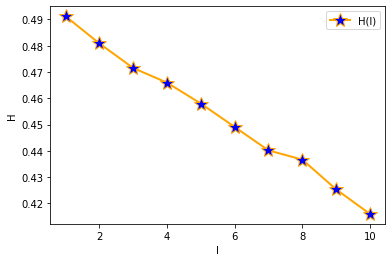

In [17]:
#plotting the estimation of H wrt to l
plt.plot( L, H, marker='*' ,markerfacecolor='blue', markersize=15, color='orange', linewidth=2, label="H(l)")


# show legend
plt.xlabel('l')
plt.ylabel('H')
plt.legend(loc='best')

### Question 4

In [18]:
# simulating a brownian motion
def BM(time):
    tk=[0,]
    tk.extend(time)
    Btk=[0,]
    for i in range(1,len(tk)):
        Btk.append(Btk[-1]+math.sqrt(tk[i]-tk[i-1])*np.random.randn())
    return Btk


In [19]:
W=BM([i*dt for i in range(10**5)])

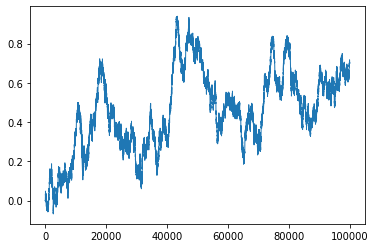

In [20]:
#plotting the simulation
plt.plot(BM([i*dt for i in range(10**5)]), linewidth=1)

In [21]:
#estimating H for a classical BM 
#using the same method as previously for the variance process
V1=BM([i*dt for i in range(10**5)])
def m(q, delt):
    a=0
    Mdelta=len(V1)-delt
    for i in range(Mdelta):
        a=a+pow(abs(V1[i+delt]-V1[i]),q)
    return (a/Mdelta)
m05=[0]*10
m1=[0]*10
m15=[0]*10
m2=[0]*10
for i in range(10):
    m05[i]=log(m(0.5,i+1))
    m1[i]=log(m(1,i+1))
    m15[i]=log(m(1.5,i+1))
    m2[i]=log(m(2,i+1))
s05, intercept, r_value, p_value, std_err=linregress(logdelta,m05)
s1, intercept, r_value, p_value, std_err=linregress(logdelta,m1)
s15, intercept, r_value, p_value, std_err=linregress(logdelta,m15)
s2, intercept, r_value, p_value, std_err=linregress(logdelta,m2)
q=[0.5,1,1.5,2]
zetaq=[s05,s1,s15,s2]
np.polyfit(q, zetaq, 1)  

print("For a classical brownian motion the parameter H is estimated at",np.polyfit(q, zetaq, 1)[0])

For a classical brownian motion the parameter H is estimated at 0.49729565373644047


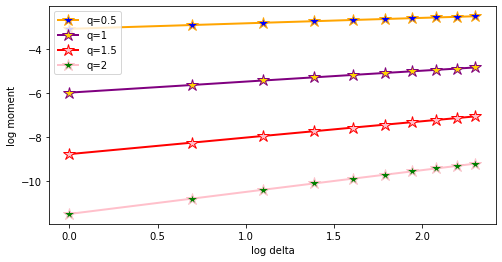

In [22]:
plt.figure(figsize=(8,4))
plt.plot( logdelta, m05, marker='*' ,markerfacecolor='blue', markersize=12, color='orange', linewidth=2, label="q=0.5")
plt.plot( logdelta, m1, marker='*' ,markerfacecolor='gold', markersize=12, color='purple', linewidth=2, label="q=1")
plt.plot( logdelta, m15, marker='*' ,markerfacecolor='pink', markersize=12, color='red', linewidth=2, label="q=1.5")
plt.plot( logdelta, m2, marker='*' ,markerfacecolor='green', markersize=12, color='pink', linewidth=2, label="q=2")
# show legend
plt.xlabel('log delta')
plt.ylabel('log moment')
plt.legend(loc='best')

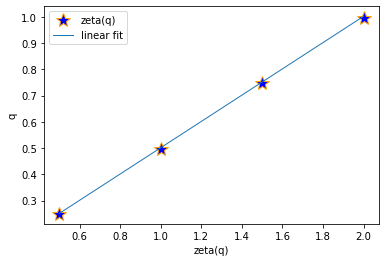

In [23]:

plt.plot( q, zetaq, marker='*' ,markerfacecolor='blue', markersize=15, color='orange', linewidth=0, label="zeta(q)")
plt.plot(q,[(0.50055856*a+0.0009439) for a in q],linewidth=1, label="linear fit")

# show legend
plt.xlabel('zeta(q)')
plt.ylabel('q')
plt.legend(loc='best')

In [24]:
#sampling a classical BM
def sampleW(l):
    a=10**5//l
    Vs=[0]*a
    for i in range(a):
        Vs[i]=W[l*i]
    return(Vs)

In [25]:
#Computing the estimation of H for every sampled path
L=[i for i in range (1,11)]
H=[0]*10
for l in L:
    V1=sampleW(l)
    def m(q, delt):
        a=0
        Mdelta=len(V1)-delt
        for i in range(Mdelta):
            a=a+pow(abs(V1[i+delt]-V1[i]),q)
        return (a/Mdelta)
    m05=[0]*10
    m1=[0]*10
    m15=[0]*10
    m2=[0]*10
    for i in range(10):
        m05[i]=log(m(0.5,i+1))
        m1[i]=log(m(1,i+1))
        m15[i]=log(m(1.5,i+1))
        m2[i]=log(m(2,i+1))
    s05, intercept, r_value, p_value, std_err=linregress(logdelta,m05)
    s1, intercept, r_value, p_value, std_err=linregress(logdelta,m1)
    s15, intercept, r_value, p_value, std_err=linregress(logdelta,m15)
    s2, intercept, r_value, p_value, std_err=linregress(logdelta,m2)
    q=[0.5,1,1.5,2]
    zetaq=[s05,s1,s15,s2]
    H[l-1]=np.polyfit(q, zetaq, 1)[0]  

In [26]:
#putting the l and H(l) into a data frame
d = {'l': L, 'H(l)': H}
df = pd.DataFrame(data=d)
df

,l,H(l)
0,1,0.500306
1,2,0.500518
2,3,0.498662
3,4,0.496599
4,5,0.496621
5,6,0.493218
6,7,0.495126
7,8,0.493862
8,9,0.493951
9,10,0.493860


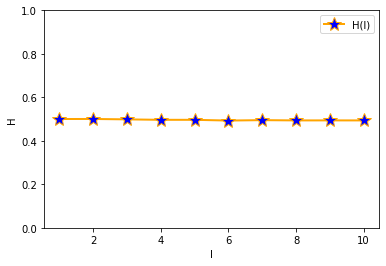

In [27]:
#plotting the estimation of H wrt l
plt.plot( L, H, marker='*' ,markerfacecolor='blue', markersize=15, color='orange', linewidth=2, label="H(l)")


# show legend
#axes.set_xlim(0, 4) 
plt.ylim(0, 1) 
plt.xlabel('l')
plt.ylabel('H')
plt.legend(loc='best')

For the classical brownian motion The estimation of H is almost constant  in spite of the variation of l and it is equal to 0.5

### Question 5

In [28]:
#simulating a fbm
m=10**3
dt=1/m
H=0.1
sigma=np.empty((m,m))
for i in range(1,m+1):
    for j in range(1,m+1):
        sigma[i-1,j-1]=0.5*(pow(abs((i)*dt),2*H)+pow(abs((j)*dt),2*H)-pow(abs((i-j)*dt),2*H))
C=np.linalg.cholesky(sigma)
Z=np.random.normal(0, 1, m)    
Ct=np.transpose(C)
X=Ct.dot(Z)
fBM=X

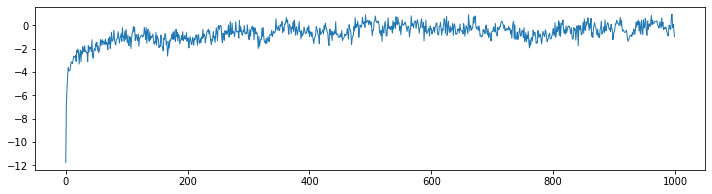

In [29]:
#plotting a path of a fBM
plt.figure(figsize=(12,3))
plt.plot(fBM, linewidth=1)

In [30]:
#estimating H for a classical BM 
#using the same method as previously for the variance process
def m(q, delt):
    a=0
    Mdelta=10**3-delt
    for i in range(Mdelta):
        a=a+pow(abs(fBM[i+delt]-fBM[i]),q)
    return (a/Mdelta)
m05=[0]*10
m1=[0]*10
m15=[0]*10
m2=[0]*10
for i in range(10):
    m05[i]=log(m(0.5,i+1))
    m1[i]=log(m(1,i+1))
    m15[i]=log(m(1.5,i+1))
    m2[i]=log(m(2,i+1))
from scipy.stats import linregress
s05, intercept, r_value, p_value, std_err=linregress(logdelta,m05)
s1, intercept, r_value, p_value, std_err=linregress(logdelta,m1)
s15, intercept, r_value, p_value, std_err=linregress(logdelta,m15)
s2, intercept, r_value, p_value, std_err=linregress(logdelta,m2)
q=[0.5,1,1.5,2]
zetaq=[s05,s1,s15,s2]
linearfit=np.polyfit(q, zetaq, 1)


In [31]:
print("the parameter H for a fractional brownian motion is estimated at",linearfit[0])

the parameter H for a fractional brownian motion is estimated at 0.10436894145979617


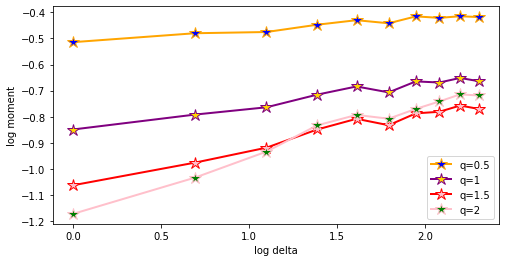

In [32]:
plt.figure(figsize=(8,4))
plt.plot( logdelta, m05, marker='*' ,markerfacecolor='blue', markersize=12, color='orange', linewidth=2, label="q=0.5")
plt.plot( logdelta, m1, marker='*' ,markerfacecolor='gold', markersize=12, color='purple', linewidth=2, label="q=1")
plt.plot( logdelta, m15, marker='*' ,markerfacecolor='pink', markersize=12, color='red', linewidth=2, label="q=1.5")
plt.plot( logdelta, m2, marker='*' ,markerfacecolor='green', markersize=12, color='pink', linewidth=2, label="q=2")
# show legend
plt.xlabel('log delta')
plt.ylabel('log moment')
plt.legend(loc='best')

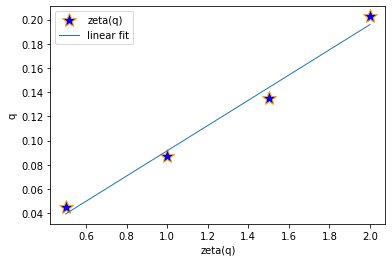

In [33]:
#
plt.plot( q, zetaq, marker='*' ,markerfacecolor='blue', markersize=15, color='orange', linewidth=0, label="zeta(q)")
plt.plot(q,[(linearfit[0]*a+linearfit[1]) for a in q],linewidth=1, label="linear fit")

# show legend
plt.xlabel('zeta(q)')
plt.ylabel('q')
plt.legend(loc='best')

In [34]:
#Sampling a fractional brownian motion
def samplefBM(l):
    a=10**3//l
    Vs=[0]*a
    for i in range(a):
        Vs[i]=fBM[l*i]
    return(Vs)

In [35]:
#Estimating H for different values of l ( sample step size)
L=[i for i in range (1,11)]
H=[0]*10
for l in L:
    V1=samplefBM(l)
    def m(q, delt):
        a=0
        Mdelta=len(V1)-delt
        for i in range(Mdelta):
            a=a+pow(abs(V1[i+delt]-V1[i]),q)
        return (a/Mdelta)
    m05=[0]*10
    m1=[0]*10
    m15=[0]*10
    m2=[0]*10
    for i in range(10):
        m05[i]=log(m(0.5,i+1))
        m1[i]=log(m(1,i+1))
        m15[i]=log(m(1.5,i+1))
        m2[i]=log(m(2,i+1))
    s05, intercept, r_value, p_value, std_err=linregress(logdelta,m05)
    s1, intercept, r_value, p_value, std_err=linregress(logdelta,m1)
    s15, intercept, r_value, p_value, std_err=linregress(logdelta,m15)
    s2, intercept, r_value, p_value, std_err=linregress(logdelta,m2)
    q=[0.5,1,1.5,2]
    zetaq=[s05,s1,s15,s2]
    H[l-1]=np.polyfit(q, zetaq, 1)[0] 
    #pd.DataFrame(data=[L,H], columns=['l', 'H(l)'])
d = {'l': L, 'H(l)': H}
df = pd.DataFrame(data=d)
df

,l,H(l)
0,1,0.104369
1,2,0.132822
2,3,0.123802
3,4,0.087778
4,5,0.100161
5,6,0.099406
6,7,0.122656
7,8,0.106974
8,9,0.115524
9,10,0.120391


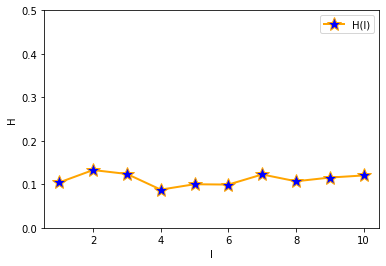

In [36]:
#plotting H wrt L for a FbM
plt.plot( L, H, marker='*' ,markerfacecolor='blue', markersize=15, color='orange', linewidth=2, label="H(l)")


# show legend
#axes.set_xlim(0, 4) 
plt.ylim(0, 0.5) 
plt.xlabel('l')
plt.ylabel('H')
plt.legend(loc='best')

# Exercice 2

## Question 2

In [37]:

#values for testing the following implemented functions
u,S0,T,rho,lamb,theta, nu, V0,n,rn,alpha, M=2.3,100,1,-0.7,0.3,0.02,0.3,0.02,20,2.5,0.6,100

In [38]:
#function that creates the vector c according to the number 
#of factor n and the value of rn

def vec_c(n,rn):
    c=[0]*n
    for i in range(n):
        c[i]=((pow(rn,1-alpha)-1)/(gamma(alpha)*gamma(2-alpha)))*pow(rn,(1-alpha)*(i+1-1-n/2)) 

    return(c)
#function that creates the vector x according to the number 
#of factor n and the value of rn
def vec_x(n,rn):
    x=[0]*n
    for i in range(n):
        x[i]=(((1-alpha)*pow(rn,2-alpha)-1)/((2-alpha)*pow(rn,1-alpha)-1))*pow(rn,i+1-1-n/2)
    return(x)

def g0(t,c,x):
    a=0
    for i in range(len(c)):
        a=a+c[i]*(1-exp(-x[i]*t))/x[i]
    b=V0+lamb*theta*a
    return(b)


In [39]:
#Function that compute the characteristic function of the 
#lifted heston model
def Ch_Lifted_Heston(u,S0,T,rho,lamb,theta,nu,V0,n,alpha,M):
    # u = argument of the ch. function
    # S0 = Initial price
    # rho,lamb,theta,nu,V0 = parameters of the Lifted Heston model
    # n = number of factors in the model
    # rN = constant used to define weights and mean-reversions
    # alpha = H+1/2 where H is the Hurst index
    # T = maturity
    # M = number of steps in the time discretization to calculate ch. function
    omega=u
    N=n
    rN=1+10*(1/(n)**0.9)
    # to make sure we calculate ch. function and not moment gen. function
    i=complex(0,1)
    omega=i*omega
    
    # Definition of weights and mean reversions in the approximation
    c=vec_c(n,rn)
    x=vec_x(n,rn)
    
    # Time steps for the approximation of psi         
    delta = T/M;
    t=np.linspace(0,M,M+1)
    t = t * delta
    gammas=x
    # Function F
    F = lambda u,v : 0.5*(u**2-u)+(rho*nu*u-lamb)*v+.5*nu**2*v**2
    # Iteration for approximation of psi - see Slide 87
    psi=np.zeros((M+1,N),dtype=complex)
    
    for k in range (1,M+1):
        for i in range(n):
            psi[k,i] = (1/(1+delta*gammas[i]))*(psi[k-1,i]+delta*F(omega,c[i]*psi[k-1,i])*1)
    #creating th vector which gonna contain g0(t_k)
    g_0=np.zeros((1,M+1))
    for k in range(1,M+2):
        g_0[0,k-1]=g0(T-t[k-1],c,gammas)
    
    Y=np.zeros((1,M+1),dtype=complex)
    phi=0
    Y=F(omega,np.dot(c,psi.transpose()))*g_0
    # Trapezoid rule to calculate phi
    weights=np.ones(M+1)*delta
    weights[0]=delta/2
    weights[M]=delta/2
    phi=np.dot(weights,Y.transpose())
    
    phi=np.exp(omega*np.log(S0)+phi)
    
    return phi

In [40]:
#test of the characteristic function
Ch_Lifted_Heston(u,S0,T,rho,lamb,theta,nu,V0,n,alpha,M)

array([-0.35072588-0.88201252j])

## Question 3

In [41]:
#implementing the integral term in the call price function
def integral_term(u,S0,T,rho,lamb,theta, nu, V0,n,alpha, M, alpha2,K):
    i = complex(0,1)
    k = np.log(K)
    d=Ch_Lifted_Heston(u-(alpha2+1)*i,S0,T,rho,lamb,theta, nu, V0,n,alpha, M)
    term1 = d*cmath.exp(- i*u*k)
    term2 = (alpha2 + i*u)*(alpha2+1 + i*u)
    out = term1/term2
    return out.real

In [42]:
#test of th eintegral_term
integral_term(u,S0,T,rho,lamb,theta,nu,V0,n,alpha,M,1,exp(-1.2))

array([477.79111475])

In [43]:
#implementing the call price function.
def Call_Price_Lifted_Heston(S0, K, T, rho, lamb, theta, nu, V0, n, alpha, M, alpha2, L):
    N=n
    k = np.log(K)
    term1 = np.exp( - alpha2*k)/np.pi
    I = scipy.integrate.quad(lambda u:integral_term(u,S0,T,rho,lamb,theta, nu, V0,n,alpha, M, alpha2,K),0,L)
   
    return term1*I[0]
    
    
    

In [44]:
#test de la fonction de pricing de call
Call_Price_Lifted_Heston(1, exp(-1.2), 1, -0.7, 0.3, 0.02, 0.3, 0.02, 20,0.6, 100, 1, 10)

0.6947750916617154

## Question 4

### To compute the implied volatility we are going to match the price obtain with the heston pricer with the  one we obtain with the classic black  scholes pricer. 
### The implied volatility is the value of sigma to insert in the black scholes formula so that its price is equal to the market price which is in this case the price given by the heston model 

In [45]:
#function given the price of a call in the black scholes model
def BS_call(S, tau,K,r,sigma): 
    N = si.norm.cdf
    d1=(np.log(S/K)+(r+0.5*sigma*sigma)*tau)/(sigma*np.sqrt(tau))
    d2=d1-sigma*np.sqrt(tau)
    res = S * N(d1) - K * np.exp(-r * tau) * (N)(d2)
    return res
#function that compute the derivative of pricer wrt to sigma
def BS_prime(S,tau,K,r,sigma): 
    n=si.norm.pdf
    d1=(np.log(S/K)+(r+0.5*sigma*sigma)*tau)/(sigma*np.sqrt(tau))
    v=S*n(d1)*np.sqrt(tau)
    return v
#computing the implied volatility using newton raphson algorithm
def implied_volatility(S,tau,K,r,V_market,sigma0):
    F=S*np.exp(r*tau)
    G=V_market*np.exp(r*tau)
    alpha=np.log(F/K)/np.sqrt(tau)
    beta=0.5*np.sqrt(tau)
    a=beta*(F+K)
    b=np.sqrt(2*np.pi)*(0.5*(F-K)-G)
    c=alpha*(F-K)
    disc=max(0,b**2-4*a*c)
    sigma0=(-b+np.sqrt(disc))/(2*a)
    sigma_etoile=sigma0
    epsilon=1.0e-6
    for i in range(1,200):
        BS_prix=BS_call(S,tau,K,r,sigma_etoile)
        bs_prime=BS_prime(S,tau,K,r,sigma_etoile)
        
        difference=-V_market+BS_prix
        
        if (abs(difference))>=epsilon:
            sigma_etoile = sigma_etoile -(difference/bs_prime)
            return sigma_etoile
        else:
            return sigma_etoile
        
#function computing the implied volatility wrt K and n( number of factors )
       
def volimp(K,n,T,L):
    #fixing the parameters of the B&S pricer
    S=1
    r=0.00
    sigma0=0.02
    tau=T
    #setting the V_market to the price given by the heston pricer
    V_market=Call_Price_Lifted_Heston(1,K,T,-0.7,0.3,0.02,0.3,0.02,n,0.6,100,1,L)
    return(implied_volatility(S,tau,K,r,V_market,sigma0))

In [46]:
#testin the implid vol function
volimp(exp(-1.2),5,1,10)


0.4622644737998907

#### Question 4.a)

In [47]:
#creating a vector of 20 equidistant strikes from -1.2 to 0.2
K=np.linspace(start=exp(-1.2), stop=exp(0.2), num=20)
#computing the imlied for each of those srike with
#with n being the umber of factors
#VolImpn is the implied volatility computed for the vector k
T=1
L=5 #Wasn't able to compute the integra to 100 #math over flow error
VolImp5=[volimp(k,5,T,L) for k in K] 
VolImp10=[volimp(k,10,T,L) for k in K] 
VolImp20=[volimp(k,20,T,L) for k in K]
VolImp50=[volimp(k,50,T,L) for k in K] 
logstrike=[log(k) for k in K]    

Text(0.5, 1.0, 'Implied volatility smile for maturity T=1')

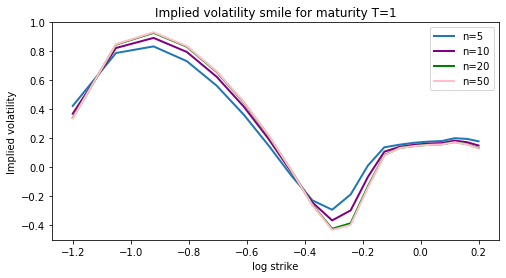

In [48]:
plt.figure(figsize=(8,4))
plt.plot( logstrike, VolImp5,  linewidth=2, label="n=5")
plt.plot( logstrike, VolImp10,  color='purple', linewidth=2, label="n=10")
plt.plot( logstrike, VolImp20, linewidth=2, label="n=20",color='green')
plt.plot( logstrike, VolImp50, color='pink', linewidth=2, label="n=50")
# show legend
plt.xlabel('log strike')
plt.ylabel('Implied volatility')
plt.legend(loc='best')
plt.title('Implied volatility smile for maturity T=1')

#### Question 4.b)

In [49]:
#creating a vector of 20 equidistant strikes from -1.2 to 0.2
K=np.linspace(start=exp(-0.15), stop=exp(0.05), num=20)
#computing the imlied for each of those srike with
#with n being the umber of factors
#VolImpn is the implied volatility computed for the vector k
T=1/26
L=15 #Wasn't able to compute the integra to 100 #math over flow error
VolImp5=[volimp(k,5,T,L) for k in K] 
VolImp10=[volimp(k,10,T,L) for k in K] 
VolImp20=[volimp(k,20,T,L) for k in K]
VolImp50=[volimp(k,50,T,L) for k in K] 
logstrike=[log(k) for k in K]    

Text(0.5, 1.0, 'Implied volatility smile for maturity T=1/26')

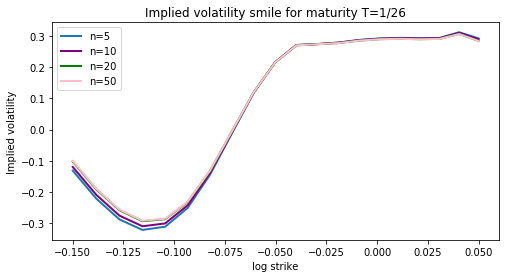

In [50]:
plt.figure(figsize=(8,4))
plt.plot( logstrike, VolImp5,  linewidth=2, label="n=5")
plt.plot( logstrike, VolImp10,  color='purple', linewidth=2, label="n=10")
plt.plot( logstrike, VolImp20, linewidth=2, label="n=20",color='green')
plt.plot( logstrike, VolImp50, color='pink', linewidth=2, label="n=50")
# show legend
plt.xlabel('log strike')
plt.ylabel('Implied volatility')
plt.legend(loc='best')
plt.title('Implied volatility smile for maturity T=1/26')